# **Malaria detection**

The results of the capstone project are presented in the PDF document "Report".



### <b>Data description </b>

There are a total of 24,958 train and 2,600 test images (colored) that we have taken from microscopic images. These images are of the following categories:<br>


**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites<br>


###<b> Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [ ]:
# Importing libraries required to load the data
import zipfile

import os

from PIL import Image

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf

from tensorflow.keras.utils import to_categorical

# To ignore warnings
import warnings

warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

### <b> Load the data</b>

**Note:**
- Download the dataset from the link: https://drive.google.com/file/d/1n3o1Xghpy9ufZwHkQFE5l5d9sUHQOUWM/view


In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/cell_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:

    zip_ref.extractall()

The extracted folder has different folders for train and test data which further contains the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network. Also, we need to create the labels for both types of images to be able to train and test the model.

In [ ]:
# Storing the path of the extracted "train" folder
train_dir = '/content/cell_images/train'

# Size of image so that each image has the same size
SIZE = 64

# Empty list to store the training images after they are converted to NumPy arrays
train_images = []

# Empty list to store the training labels (0 - uninfected, 1 - parasitized)
train_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "train" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(train_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:

            # Opening each image using the path of that image
            image = Image.open(train_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            train_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                train_labels.append(1)

            else:

                train_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [ ]:
# Storing the path of the extracted "test" folder
test_dir = '/content/cell_images/test'

# Size of image so that each image has the same size (it must be same as the train image size)
SIZE = 64

# Empty list to store the testing images after they are converted to NumPy arrays
test_images = []

# Empty list to store the testing labels (0 - uninfected, 1 - parasitized)
test_labels = []

In [ ]:
# Run the same code for "parasitized" as well as "uninfected" folders within the "test" folder
for folder_name in ['/parasitized/', '/uninfected/']:

    # Path of the folder
    images_path = os.listdir(test_dir + folder_name)

    for i, image_name in enumerate(images_path):

        try:
            # Opening each image using the path of that image
            image = Image.open(test_dir + folder_name + image_name)

            # Resizing each image to (64, 64)
            image = image.resize((SIZE, SIZE))

            # Converting images to arrays and appending that array to the empty list defined above
            test_images.append(np.array(image))

            # Creating labels for parasitized and uninfected images
            if folder_name == '/parasitized/':

                test_labels.append(1)

            else:

                test_labels.append(0)

        except Exception:

            pass

# Converting lists to arrays
test_images = np.array(test_images)

test_labels = np.array(test_labels)

###<b> Checking the shape of train and test images

In [ ]:
print("Shape:", train_images.shape) # Shape of train dataset
print("Shape:", train_images[0].shape) #Shape of first image in train dataset
print("First image:\n", train_images[0])#Array of pixels of the first image in train dataset

Shape: (24958, 64, 64, 3)
Shape: (64, 64, 3)
First image:
 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
print("Shape:", test_images.shape) # Shape of test dataset
print("Shape:", test_images[0].shape) #Shape of first image in test dataset
print("First image:\n", test_images[0])#Array of pixels of the first image in test dataset

Shape: (2600, 64, 64, 3)
Shape: (64, 64, 3)
First image:
 [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [19 13 14]
  [ 1  1  1]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


####<b> Observations and insights:
* Shape of train dataset (length train dataset: 24958 & shape of images in train dataset [64,64,3])

* Shape of test dataset(length train dataset: 2600 & shape of images in train dataset [64,64,3])



###<b> Checking the shape of train and test labels

In [ ]:
# Shape of labels
print("Shape:", train_labels.shape)
print("Shape:", train_labels[0].shape)
print("First image:\n", train_labels[0])

print("Shape:", test_labels.shape)
print("Shape:", test_labels[0].shape)
print("First image:\n", test_labels[0])

Shape: (24958,)
Shape: ()
First image:
 1
Shape: (2600,)
Shape: ()
First image:
 1


####<b> Observations and insights:
* The length of the labels in train dataset is the same as the length of the images in train dataset: 24958

* The length of the labels in test dataset is the same as the length of the images in test dataset: 2600



### <b>Check the minimum and maximum range of pixel values for train and test images

In [ ]:
# Try to use min and max function from numpy

print("Minimum pixel value of train images: ", np.amin(train_images))
print("Maximum pixel value of train images: ", np.amax(train_images))

print("Minimum pixel value of test images: ", np.amin(test_images))
print("Maximum pixel value of test images: ", np.amax(test_images))


Minimum pixel value of train images:  0
Maximum pixel value of train images:  255
Minimum pixel value of test images:  0
Maximum pixel value of test images:  255


In [ ]:
#Note that if the numpy array represents a color image with multiple channels, we can specify the axis along which to calculate the minimum and maximum values. For example, if img is a 3-dimensional numpy array with shape (height, width, channels), we can find the minimum and maximum pixel values along the channel axis using the following code:
print("Minimum pixel value of train images: ", np.amin(train_images, axis=(0, 1)))
print("Maximum pixel value of train images: ", np.amax(train_images, axis=(0, 1)))

print("Minimum pixel value of test images: ", np.amin(test_images, axis=(0, 1)))
print("Maximum pixel value of test images: ", np.amax(test_images, axis=(0, 1)))


Minimum pixel value of train images:  [[0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Maximum pixel value of train images:  [[255 229 233]
 [255 223 240]
 [255 239 240]
 [255 239 233]
 [255 241 228]
 [255 238 239]
 [255 241 231]
 [255 242 227]
 [255 231 228]
 [255 235 235]
 [255 241 234]
 [255 236 237]
 [255 238 231]
 [255 244 227]
 [255 239 232]
 [255 237 233]
 [255 233 230]
 [255 239 230]
 [255 237 231]
 [255 230 229]
 [255 232 229]
 [255 235 227]
 [255 234 229]
 [

####<b> Observations and insights:
*The matrix has 64 rows for train and test images. This is fitting well with the shape of the images in the train dataset: [64,64,3]. Each row has 3 channels (red, green and blue). In RGB mode, the red, green, and blue components are each assigned an intensity value for every pixel—ranging from 0 (black) to 255 (white).



###<b> Count the number of values in both uninfected and parasitized

In [ ]:
# Try to use value_counts to count the values --> Check "Solution Notebook_Food Image Classification", where this function is implemented.
#counts = train_labels.value_counts()

#Train_label list has been converted to an array before. The value_counts() method is not a built-in method for numpy arrays. In this case we have to use the numpy.unique() function.

unique, counts = np.unique(train_labels, return_counts=True)
for value, count in zip(unique, counts):
    print(value, count)

0 12376
1 12582


*There are 12376 uninfected (0) and 12582 parasitized (1) images in train dataset. Total number of images = 12376 + 12582 = 24958

*There are 12376 uninfected (0) and 12582 parasitized (1) images in train dataset. Total number of images = 12376 + 12582 = 24958

In [ ]:

unique, counts = np.unique(test_labels, return_counts=True)
for value, count in zip(unique, counts):
    print(value, count)

0 1300
1 1300


*There are 1300 uninfected (0) and 1300 parasitized (1) images in test dataset. Total number of images = 1300 + 1300 = 2600.

###<b>Normalize the images

In [ ]:
# Try to normalize the train and test images by dividing it by 255 and convert them to float32 using astype function
train_images = (train_images/255).astype('float32')

test_images = (test_images/255).astype('float32')

###<b> Plot to check if the data is balanced

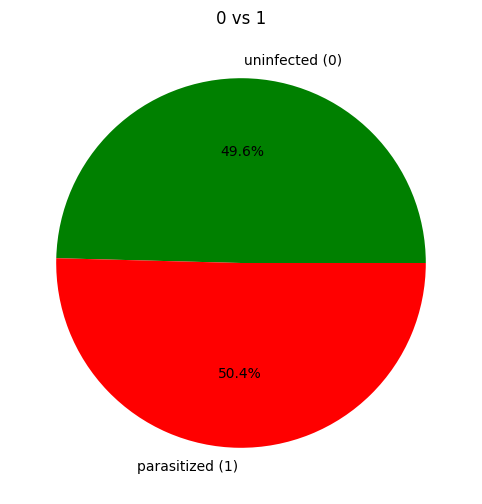

In [ ]:
# Counting values in train_labels
unique, counts = np.unique(train_labels, return_counts=True)

# Creating pie plot
fig = plt.figure(figsize=(10, 6))

# creating the pie plot
plt.pie(counts, labels=['uninfected (0)', 'parasitized (1)'], colors=['g', 'r'], autopct='%1.1f%%')
plt.title("0 vs 1")

# Displaying the plot
plt.show()


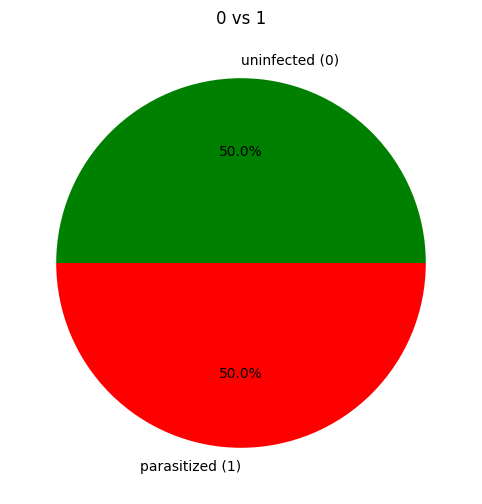

In [ ]:
# Counting values in test_labels
unique, counts = np.unique(test_labels, return_counts=True)

# Creating pie plot
fig = plt.figure(figsize=(10, 6))

# creating the pie plot
plt.pie(counts, labels=['uninfected (0)', 'parasitized (1)'], colors=['g', 'r'], autopct='%1.1f%%')
plt.title("0 vs 1")

# Displaying the plot
plt.show()

####<b> Observations and insights:
*The number os uninfected and parasitized images are almost the same in data and train datasets.

### <b>Data exploration</b>


####<b> Visualize the images

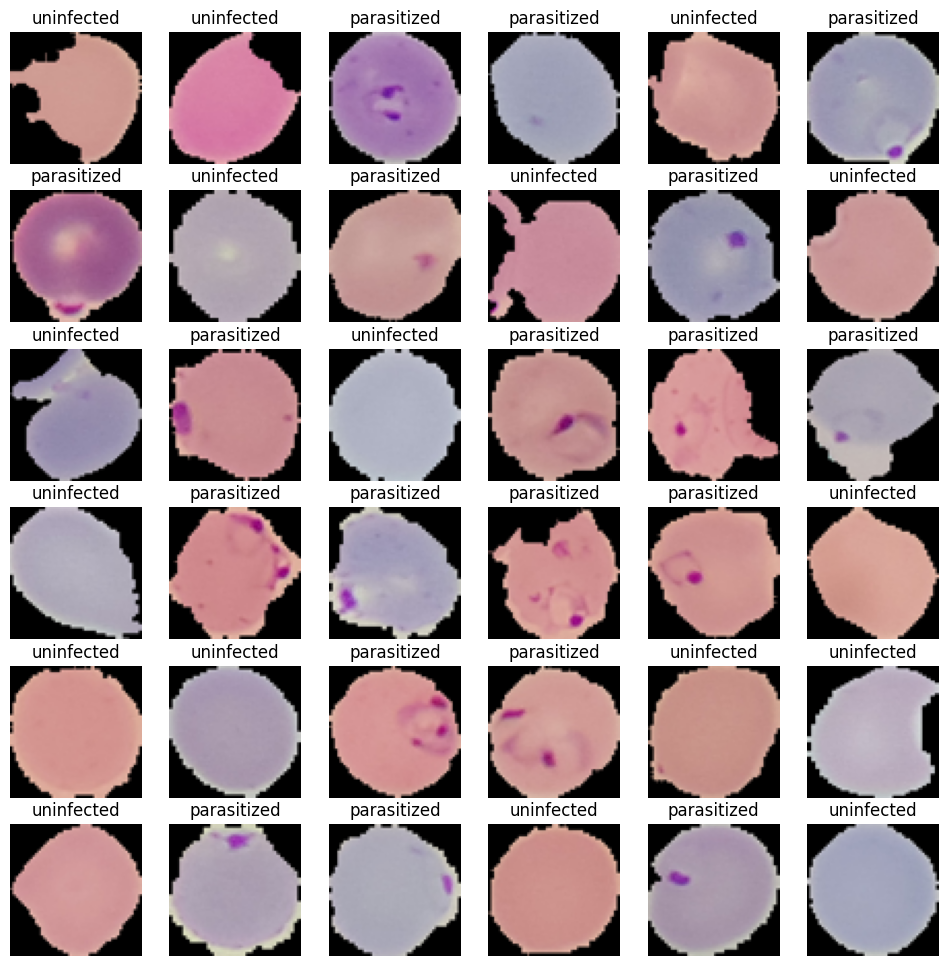

In [ ]:
np.random.seed(42)

plt.figure(1, figsize = (12 , 12))

for n in range(1, 37):

    plt.subplot(6, 6, n)

    index = int(np.random.randint(0, train_images.shape[0], 1))

    if train_labels[index] == 1:

        plt.title('parasitized')

    else:
        plt.title('uninfected')

    plt.imshow(train_images[index])

    plt.axis('off')


####<b> Observations and insights:
 The parasitized cells contain the Plasmodium parasite which causes malaria, which is the red spot that can be observed im the images. The uninfected cells do not present any red spot.

####<b> Plotting the mean images for parasitized and uninfected

In [ ]:
# Function to find the mean
def find_mean_img(full_mat, title):

    # Calculate the average
    mean_img = np.mean(full_mat, axis = 0)[0]

    # Reshape it back to a matrix
    plt.imshow(mean_img)

    plt.title(f'Average {title}')

    plt.axis('off')

    plt.show()

    return mean_img

<b> Mean image for parasitized

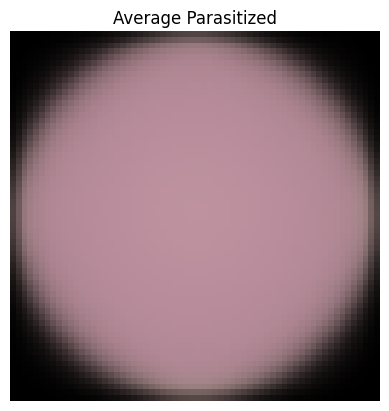

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
parasitized_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 1:

              parasitized_data.append([img])

parasitized_mean = find_mean_img(np.array(parasitized_data), 'Parasitized')   # find the mean

<b> Mean image for uninfected

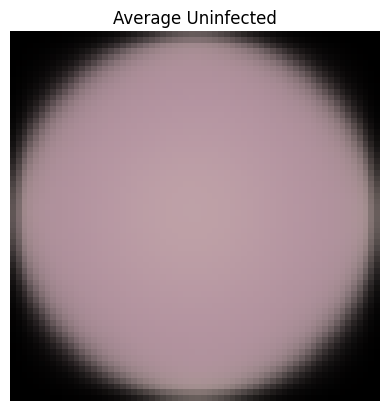

In [ ]:
# If the label = 1 then the image is parasitised and if the label = 0 then the image is uninfected
uninfected_data = []  # Create a list to store the parasitized data

for img, label in zip(train_images, train_labels):

        if label == 0:

              uninfected_data.append([img])

uninfected_mean = find_mean_img(np.array(uninfected_data), 'Uninfected')   # find the mean


####<b> Observations and insights:
There are differences in the color intensity of the parasitized and uninfected cells. The mean image for parasitized images is slightly darker than the mean image for uninfected images.

###<B>One hot encoding on the train and test labels

In [ ]:
# Encode train labels
train_labels = to_categorical(train_labels, 2)

# Encode test labels
test_labels = to_categorical(test_labels, 2)

### **Model 1 (base model)**



####<b> Importing the required libraries for building and training our Model

In [ ]:

from tensorflow.keras import backend

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,  BatchNormalization, LeakyReLU

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from random import shuffle

backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

####<b> Building the base model

In [ ]:
backend.clear_session() # Clearing the backend for new model

In [ ]:
# Creating sequential model
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model.add(MaxPooling2D(pool_size = 2))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))

model.add(Dropout(0.4))

model.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and train our Model

In [ ]:
# Fit the model with min batch size as 32 can tune batch size to some factor of 2^power ]
history = model.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 6s 6ms/step - loss: 0.4774 - accuracy: 0.7660 - val_loss: 0.1835 - val_accuracy: 0.9253
Epoch 2/20
624/624 [==============================] - 3s 5ms/step - loss: 0.1243 - accuracy: 0.9582 - val_loss: 0.1198 - val_accuracy: 0.9786
Epoch 3/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0960 - accuracy: 0.9704 - val_loss: 0.0771 - val_accuracy: 0.9850
Epoch 4/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0812 - accuracy: 0.9737 - val_loss: 0.0601 - val_accuracy: 0.9910
Epoch 5/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0738 - accuracy: 0.9755 - val_loss: 0.0505 - val_accuracy: 0.9910
Epoch 6/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.0830 - val_accuracy: 0.9824
Epoch 7/20
624/624 [==============================] - 3s 5ms/step - loss: 0.0694 - accuracy: 0.9781 - val_loss: 0.0983 - val_accuracy: 0.9762


*To prevent overfitting, the epoch stop callback can be used to monitor metrics such as validation accuracy or loss, and stop the training process if these metrics stop improving or start getting worse.

*EarlyStopping: This is a callback function that monitors a specific metric (in this case, the validation loss) during the training process and stops the training if the metric does not improve for a certain number of epochs (defined by the patience parameter). The purpose of this callback is to prevent overfitting of the model to the training data.--In our case "val_loss" is 0.9868 for epoch 4 and "val_loss" is 0.0902 foe epoch 5. It increases, therefore the training process will be stoppped.


*ModelCheckpoint: This is a callback function that saves the model weights to a file after each epoch if the validation loss improves. This allows you to keep track of the best model weights seen during the training process and to use them for inference later. The save_best_only parameter ensures that only the weights for the best-performing model on the validation set are saved.

Together, these two callbacks work to prevent overfitting and to save the best model weights during the training process. Specifically, the EarlyStopping callback stops the training if the validation loss does not improve for 2 epochs, while the ModelCheckpoint callback saves the best-performing model weights seen during the training process to a file.

####<b> Evaluating the model on test data

In [ ]:
accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:', accuracy[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0947 - accuracy: 0.9758

 Test_Accuracy: 0.9757692217826843


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0      0.973     0.978     0.976      1300
           1      0.978     0.973     0.976      1300

    accuracy                          0.976      2600
   macro avg      0.976     0.976     0.976      2600
weighted avg      0.976     0.976     0.976      2600



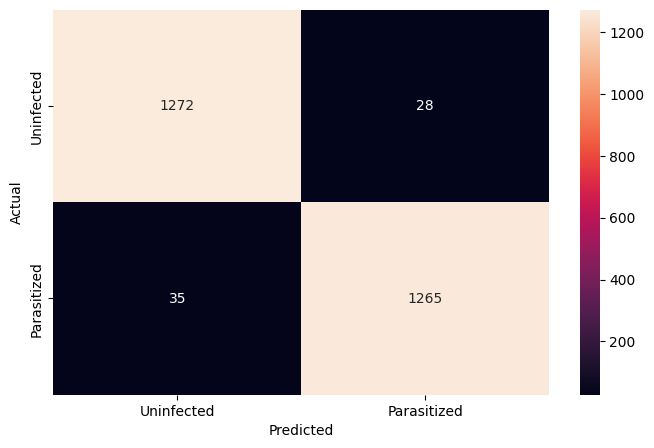

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

Precision, recall, F1-score, and support are four commonly used metrics for evaluating the performance of a machine learning model, particularly in the context of classification tasks.

Precision: Precision measures the proportion of true positives (correctly classified positive instances) among all instances that are predicted to be positive (true positives and false positives). It is a measure of the model's ability to avoid false positives.

Recall: Recall measures the proportion of true positives among all actual positive instances in the data set. It is a measure of the model's ability to identify all positive instances.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. F1-score is often used as an overall evaluation metric when you want to balance the trade-off between precision and recall.

Support: Support is the number of samples in each class. In other words, it is the number of instances in the dataset that belong to a specific class.

The main difference between these four metrics is their focus. Precision focuses on the true positive rate among predicted positives, recall focuses on the true positive rate among actual positives, F1-score balances precision and recall, and support simply represents the number of instances in each class.

In practice, you need to choose the appropriate metric depending on your specific problem and the evaluation criteria that are most important to you. For example, if you want to minimize the number of false positives (i.e., prioritize precision), you may use precision as the primary evaluation metric. If you want to ensure that all positive instances are identified (i.e., prioritize recall), you may use recall as the primary evaluation metric. If you want to balance both precision and recall, you may use F1-score.

<b>Plotting the train and validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history):

    N = len(history.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

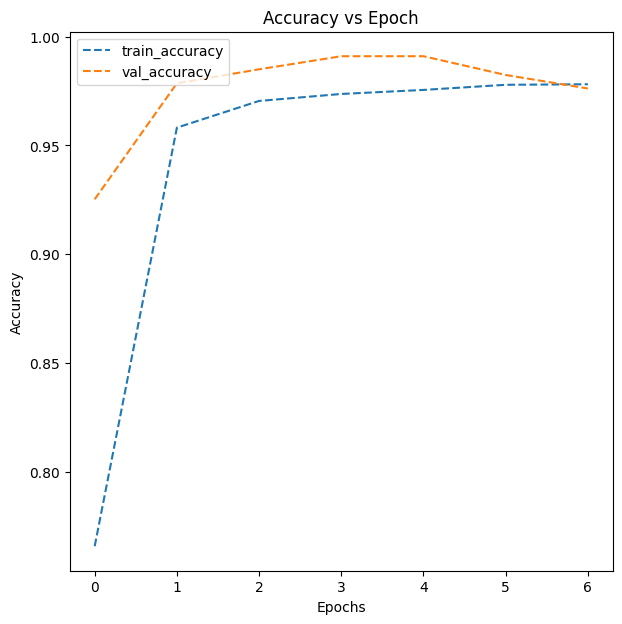

In [ ]:
plot_accuracy(history)



* We can clearly observe that the training and valiation accuracy are increasing
* We can also notice that validation accuracy is slightly higher than the train accuracy. Let's build another model with a few more add on layers and different activation functions to check if we can improve it.

###<b> Model 2 (5 conv. layers and ReLu activation function)

In [ ]:
backend.clear_session() # Clearing the backend for new model

####<b> Building the Model

In [ ]:
# Creating sequential model
model1 = Sequential()

# Build the model here and add new layers

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu", input_shape = (64, 64, 3)))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))


model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))


model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(MaxPooling2D(pool_size = 2))

model1.add(Dropout(0.2))


model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))#Layer added
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))



model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))  #Layer added
model1.add(MaxPooling2D(pool_size = 2))
model1.add(Dropout(0.2))


model1.add(Flatten())

model1.add(Dense(512, activation = "relu"))

model1.add(Dropout(0.4))

model1.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0

####<b> Compiling the model

In [ ]:
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

<b> Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
            ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
history1 = model1.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks,  validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 7s 7ms/step - loss: 0.3475 - accuracy: 0.8255 - val_loss: 0.1349 - val_accuracy: 0.9732
Epoch 2/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0938 - accuracy: 0.9693 - val_loss: 0.0518 - val_accuracy: 0.9862
Epoch 3/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0809 - accuracy: 0.9725 - val_loss: 0.0801 - val_accuracy: 0.9796
Epoch 4/20
624/624 [==============================] - 4s 6ms/step - loss: 0.0758 - accuracy: 0.9751 - val_loss: 0.0719 - val_accuracy: 0.9746


####<b> Evaluating the model

In [ ]:
accuracy1 = model1.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy1[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0559 - accuracy: 0.9835

 Test_Accuracy: 0.9834615588188171


<b> Plotting the confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0      0.987     0.980     0.983      1300
           1      0.980     0.987     0.984      1300

    accuracy                          0.983      2600
   macro avg      0.983     0.983     0.983      2600
weighted avg      0.983     0.983     0.983      2600



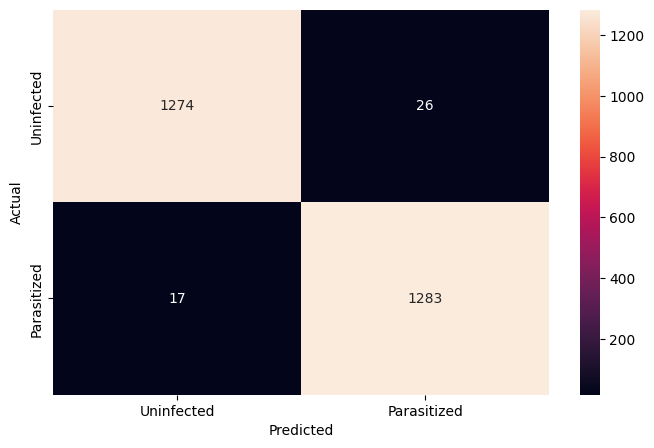

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model1.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))


# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Plotting the train and the validation curves

In [ ]:
# Function to plot train and validation accuracy
def plot_accuracy(history1):

    N = len(history1.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history1.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history1.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")

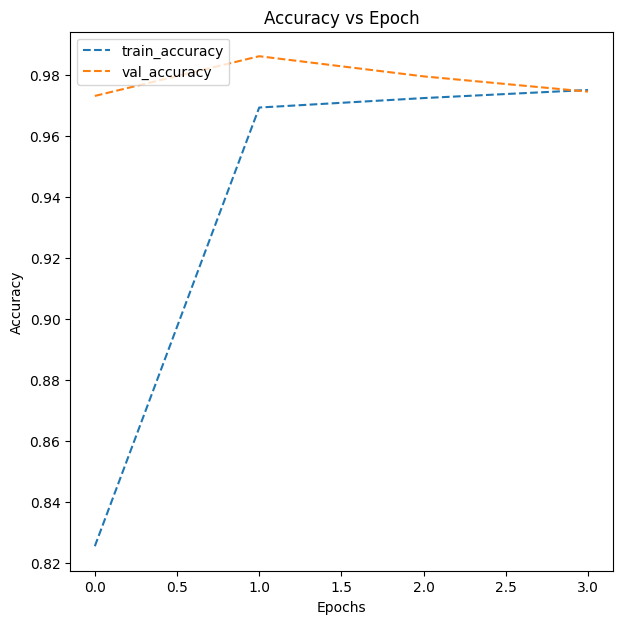

In [ ]:
plot_accuracy(history1)

####<b> Observations</b><br>
We added two new convolutional layers:

model1.add(Conv2D(filters = 32, kernel_size = 2, padding = "same", activation = "relu"))

model1.add(Conv2D(filters = 64, kernel_size = 2, padding = "same", activation = "relu"))

 *The model accuracy has been slightly improved. Before: Test_Accuracy:- 0.9823076725006104, After: est_Accuracy:- 0.9834615588188171.

*Plot accuracy:The validation accuracy is still higher than the train accuracy but both lines are closer to each other than in the first model.

*Confusion matrix:more uninfected cells have been correctly identified.
_________________________________________________


Now let's build a model using BatchNormalization and LeakyRelu as our activation function.

###<b> Model 3 (5 conv. layers, batch normalization and LeakyReLU)

In [ ]:
backend.clear_session() # Clearing the backend for new model

####<b> Building the Model

In [ ]:
# CNN model with 5 concolutional layers
model2 = Sequential()

# First Convolutional Layer
model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model2.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model2.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model2.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Convolutional Layer
model2.add(Conv2D(512, kernel_size=(3, 3), padding='same'))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model2.add(Flatten())

# First Dense Layer
model2.add(Dense(512))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Second Dense Layer
model2.add(Dense(256))
model2.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Output Layer
model2.add(Dense(2, activation = "softmax"))


# Compile the model

model2.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

####<b>Compiling the model

In [ ]:
model2.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

<b> Using callbacks

In [ ]:
#create the callbacks similarly as done in the base model
#As callbacks will help us in saving our checkpoints and stopping at an accuracy where the model doesnot seem to improve

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and train the model

In [ ]:
history2 = model2.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 11s 10ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.0590 - val_accuracy: 0.9790
Epoch 2/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0686 - accuracy: 0.9783 - val_loss: 0.0653 - val_accuracy: 0.9746
Epoch 3/20
624/624 [==============================] - 6s 9ms/step - loss: 0.0657 - accuracy: 0.9781 - val_loss: 0.0235 - val_accuracy: 0.9920
Epoch 4/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0639 - accuracy: 0.9784 - val_loss: 0.0580 - val_accuracy: 0.9796
Epoch 5/20
624/624 [==============================] - 5s 9ms/step - loss: 0.0577 - accuracy: 0.9817 - val_loss: 0.0747 - val_accuracy: 0.9822


<b>Plotting the train and validation accuracy

In [ ]:
# Plotting the accuracies
# train and validation accuracy
def plot_accuracy(history2):

    N = len(history2.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history2.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history2.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")


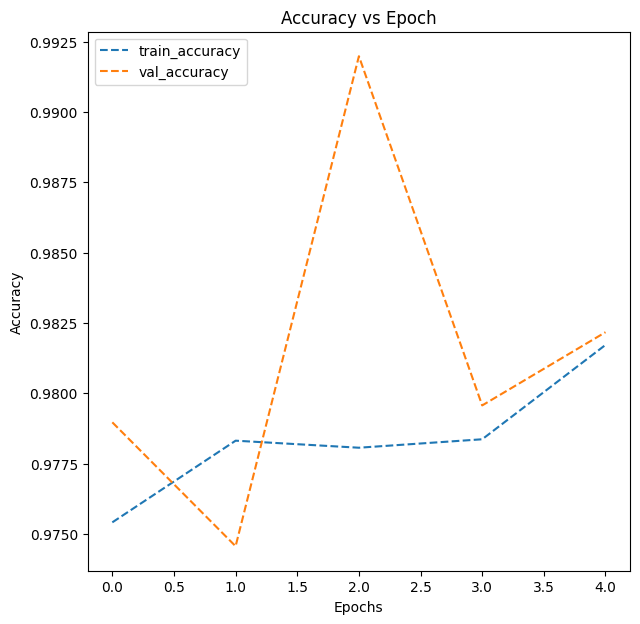

In [ ]:
plot_accuracy(history2)

####<b>Evaluating the model

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy2 = model2.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy2[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0534 - accuracy: 0.9862

 Test_Accuracy: 0.9861538410186768


####<b>Observations and insights:
Base model accuracy:0.9800000190734863

Model 1 accuracy:0.9823076725006104

Model 2 accuracy: 0.9842307567596436

The model does not present a big improvement after implementing BatchNormalization and LeakyRelu as our activation function.

<b> Generate the classification report and confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0      0.982     0.990     0.986      1300
           1      0.990     0.982     0.986      1300

    accuracy                          0.986      2600
   macro avg      0.986     0.986     0.986      2600
weighted avg      0.986     0.986     0.986      2600



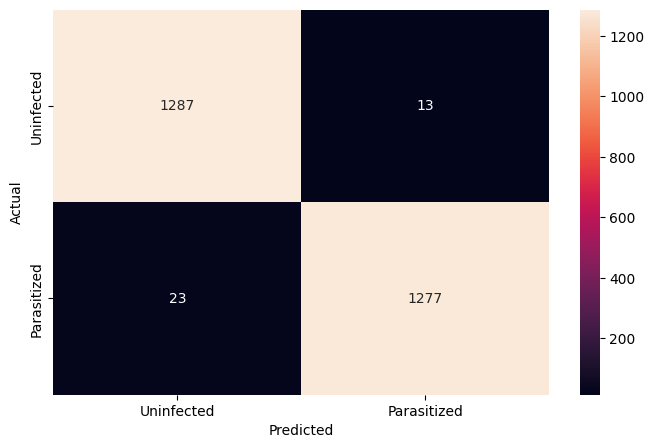

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model2.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


###<b>Model 4 (data augmentation)
There are several data augmentation techniques that can be useful for improving the performance of the model.

In [ ]:
backend.clear_session() # Clearing backend for new model

####<b> Using image data generator

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size = 0.2, random_state = 42)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Using ImageDataGenerator to generate images
train_datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True, zoom_range = 0, rotation_range = 35)

val_datagen  = ImageDataGenerator()

# Flowing training images using train_datagen generator
train_generator = train_datagen.flow(x = X_train, y = y_train, batch_size = 64, seed = 42, shuffle = True)


# Flowing validation images using val_datagen generator
val_generator =  val_datagen.flow(x = X_val, y = y_val, batch_size = 64, seed = 42, shuffle = True)


####<B>Visualizing Augmented images

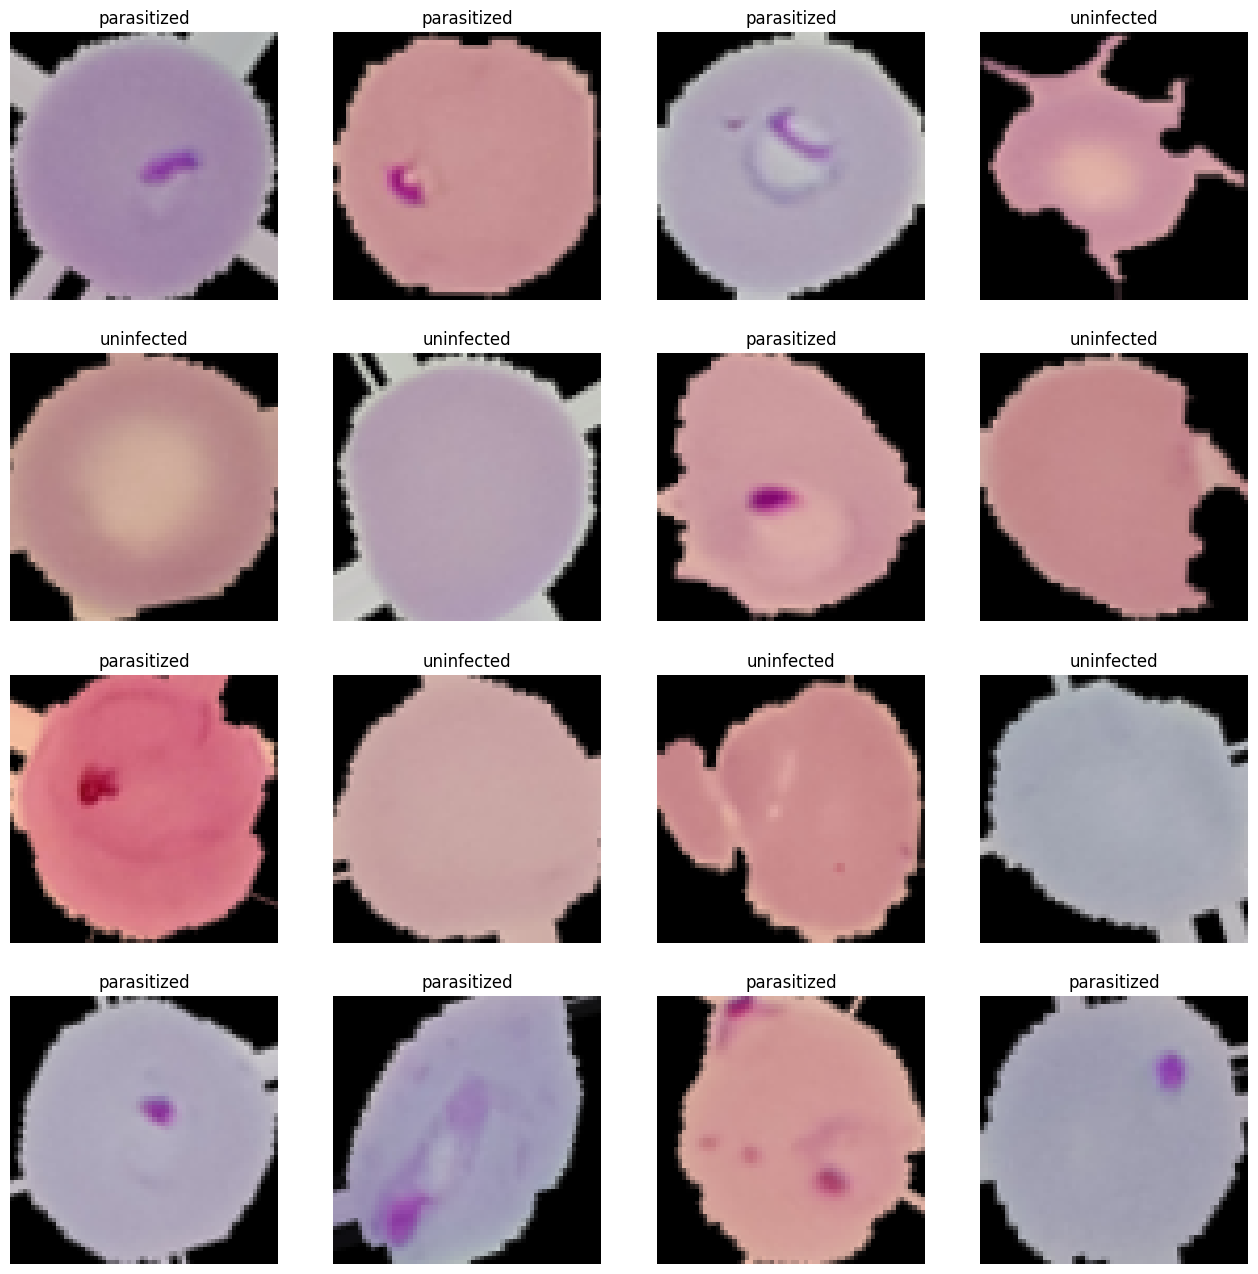

In [ ]:
# Creating an iterable for images and labels from the training data
images, labels = next(train_generator)

# Plotting 16 images from the training data
fig, axes = plt.subplots(4, 4, figsize = (16, 8))

fig.set_size_inches(16, 16)
for (image, label, ax) in zip(images, labels, axes.flatten()):

    ax.imshow(image)

    if label[1] == 1:

        ax.set_title('parasitized')

    else:

        ax.set_title('uninfected')

    ax.axis('off')

####<b>Observations and insights:
horizontal_flip = True: This parameter enables random horizontal flipping of the input images during training, which helps to increase the diversity of the training data and reduce overfitting.

zoom_range = 0.5: This parameter enables random zooming of the input images during training, with a maximum zoom range of 50%, which helps to introduce variations in the scale of the objects in the image.

rotation_range = 30: This parameter enables random rotation of the input images during training, with a maximum rotation angle of 30 degrees, which helps to introduce variations in the orientation of the objects in the image.
By applying these data augmentation techniques, the ImageDataGenerator instance can generate a wide variety of augmented images from a relatively small set of input images, which can help to improve the performance and robustness of the neural network model.

####<b>Building the Model

In [ ]:
# CNN model with 5 convolutional layers
model3 = Sequential()

# First Convolutional Layer
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model3.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model3.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Convolutional Layer
model3.add(Conv2D(512, kernel_size=(3, 3), padding='same'))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model3.add(Flatten())

# First Dense Layer
model3.add(Dense(512))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Second Dense Layer
model3.add(Dense(256))
model3.add(LeakyReLU(alpha=0.1))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Output Layer
model3.add(Dense(2, activation = "softmax"))


# Compile the model

model3.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

<b>Using Callbacks

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b> Fit and Train the model

In [ ]:
history3 = model3.fit(train_generator,
                                  validation_data = val_generator,
                                  batch_size = 32, callbacks = callbacks,
                                  epochs = 20, verbose = 1)

Epoch 1/20
312/312 [==============================] - 27s 69ms/step - loss: 0.1770 - accuracy: 0.9381 - val_loss: 2.7028 - val_accuracy: 0.5220
Epoch 2/20
312/312 [==============================] - 21s 69ms/step - loss: 0.0783 - accuracy: 0.9752 - val_loss: 0.1855 - val_accuracy: 0.9583
Epoch 3/20
312/312 [==============================] - 22s 69ms/step - loss: 0.0694 - accuracy: 0.9772 - val_loss: 0.0654 - val_accuracy: 0.9786
Epoch 4/20
312/312 [==============================] - 21s 69ms/step - loss: 0.0689 - accuracy: 0.9764 - val_loss: 0.0567 - val_accuracy: 0.9808
Epoch 5/20
312/312 [==============================] - 21s 68ms/step - loss: 0.0641 - accuracy: 0.9776 - val_loss: 0.0785 - val_accuracy: 0.9796
Epoch 6/20
312/312 [==============================] - 21s 69ms/step - loss: 0.0620 - accuracy: 0.9777 - val_loss: 0.0513 - val_accuracy: 0.9804
Epoch 7/20
312/312 [==============================] - 21s 68ms/step - loss: 0.0623 - accuracy: 0.9789 - val_loss: 0.1430 - val_accuracy:

####<B>Evaluating the model

<b>Plot the train and validation accuracy

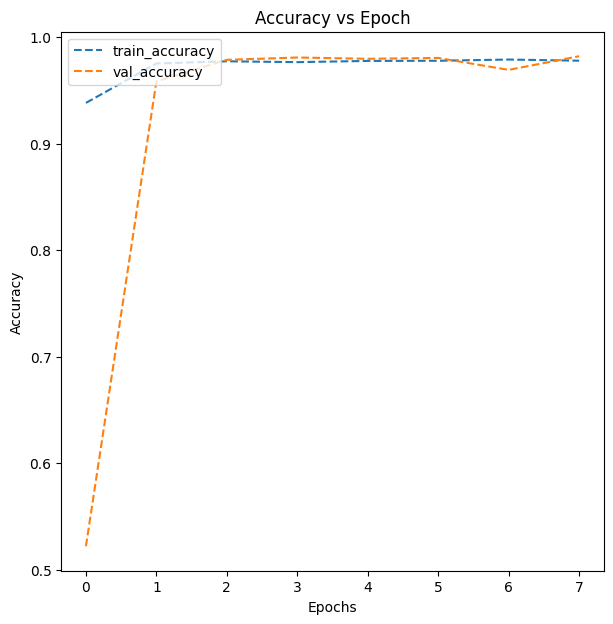

In [ ]:
# Plotting the accuracies
plot_accuracy(history3)

In [ ]:
# Evaluating the model on test data
accuracy3 = model3.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy3[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9877

 Test_Accuracy: 0.9876922965049744


<B>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0      0.988     0.987     0.988      1300
           1      0.987     0.988     0.988      1300

    accuracy                          0.988      2600
   macro avg      0.988     0.988     0.988      2600
weighted avg      0.988     0.988     0.988      2600



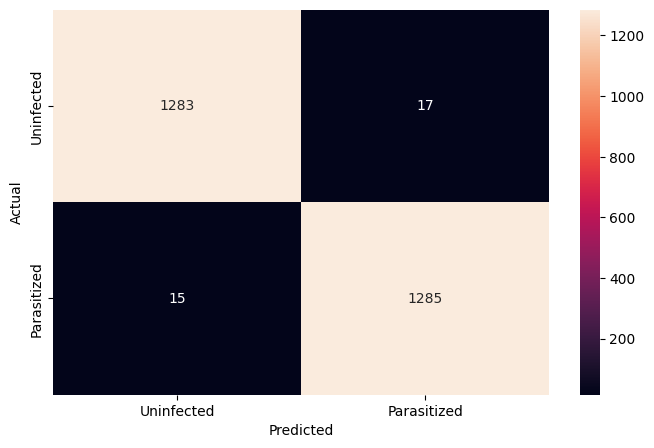

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model3.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

<b> Check missclassified images

82/82 [==============================] - 0s 2ms/step


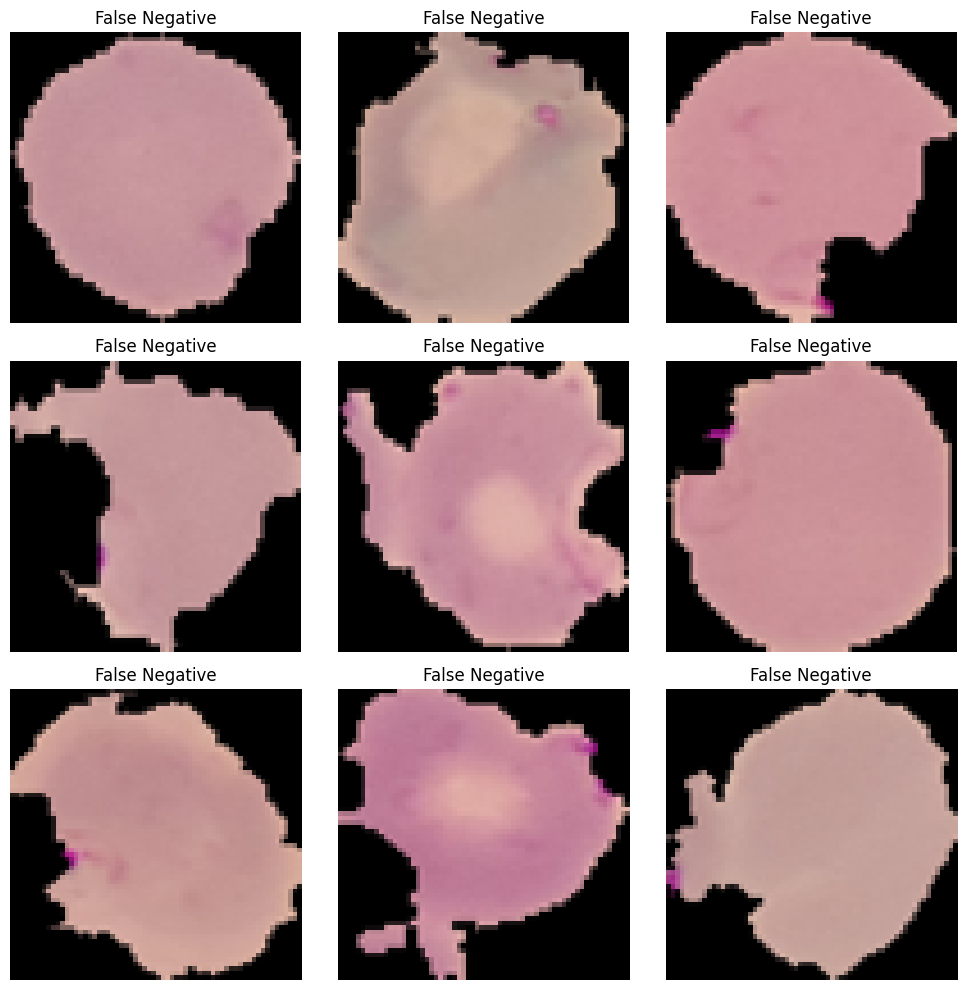

In [ ]:
# Get the predictions of your model on the test dataset
predictions = model.predict(test_images)

# Compare the predictions with the true labels of the test dataset to identify the false negative images
false_negative_idx = np.where((predictions[:, 0] < 0.5) & (test_labels[:, 0] == 1))[0]

# Extract the false negative images and their true and predicted labels
false_negative_images = test_images[false_negative_idx]
false_negative_labels = test_labels[false_negative_idx]

# Plot the false negative images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(false_negative_images[i])
    ax.set_title("False Negative")
    ax.axis('off')
plt.tight_layout()
plt.show()


82/82 [==============================] - 0s 2ms/step


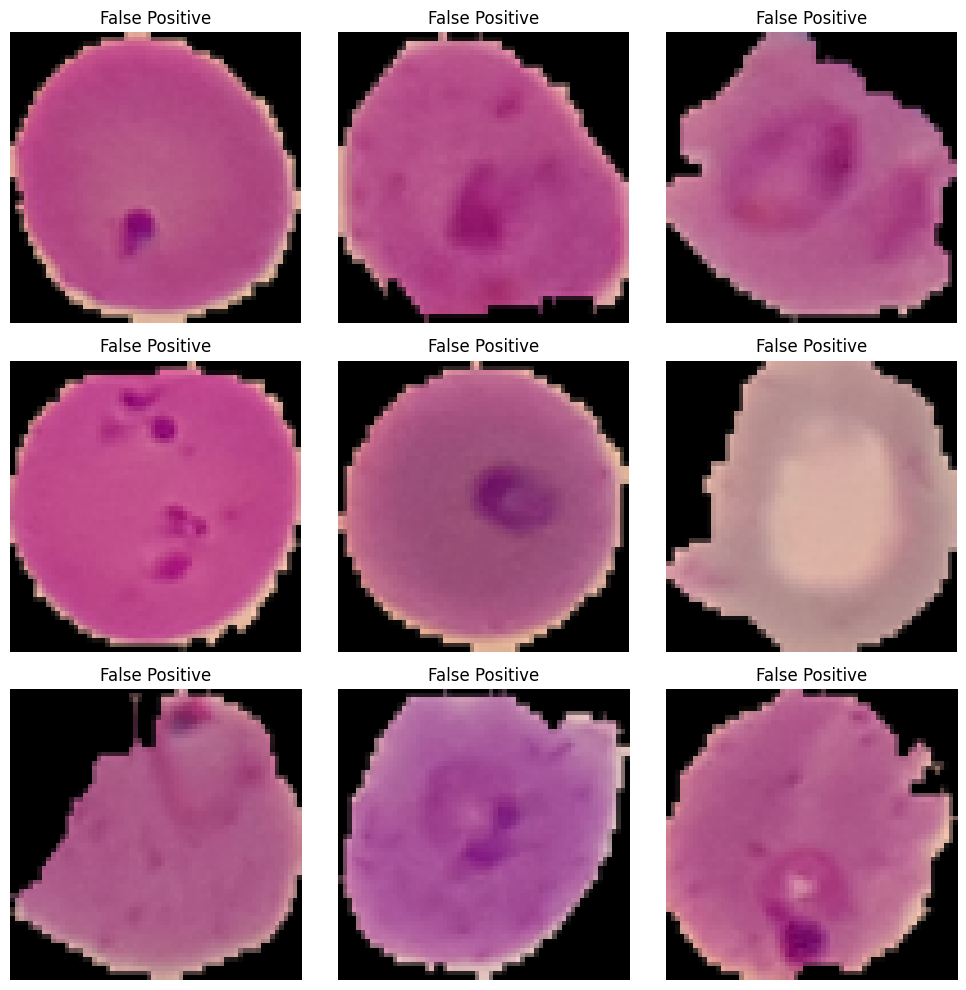

In [ ]:
# Get the predictions of your model on the test dataset
predictions = model.predict(test_images)

# Compare the predictions with the true labels of the test dataset to identify the false positive images
false_positive_idx = np.where((predictions[:, 0] > 0.5) & (test_labels[:, 0] == 0))[0]

# Extract the false positive images and their true and predicted labels
false_positive_images = test_images[false_positive_idx]
false_positive_labels = test_labels[false_positive_idx]

# Plot the false positive images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    ax.imshow(false_positive_images[i])
    ax.set_title("False Positive")
    ax.axis('off')
plt.tight_layout()
plt.show()

## **Model 5 (HSV images)**

In [ ]:
backend.clear_session() # Clearing backend for new model

**Convert train data**

In [ ]:
import cv2
import numpy as np

# Load the dataset
# train_images = np.load('train_images.npy')
# test_images = np.load('test_images.npy')

# Convert images to HSV format
def rgb_to_hsv(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image

train_images_hsv = np.array([rgb_to_hsv(image) for image in train_images])
test_images_hsv = np.array([rgb_to_hsv(image) for image in test_images])

# Save the HSV images
np.save('train_images_hsv.npy', train_images_hsv)
np.save('test_images_hsv.npy', test_images_hsv)

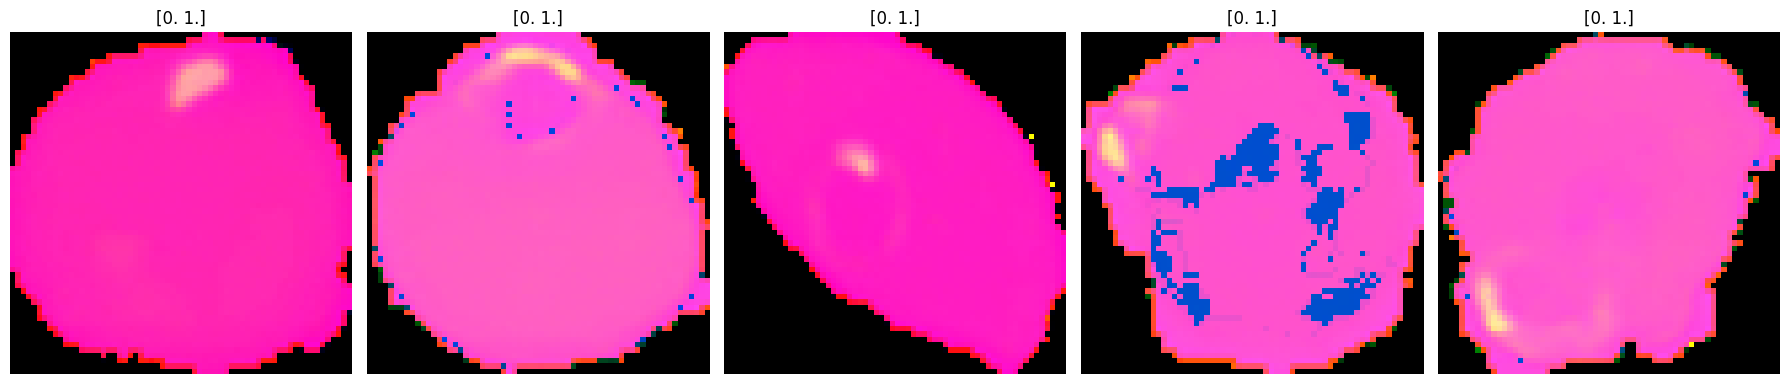

In [ ]:
viewimage = np.random.randint(1, 100, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(train_images_hsv[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
len(train_images_hsv)

24958

In [ ]:
len(test_images_hsv)

2600

In [ ]:
#import cv2

gfx=[]   # to hold the HSV image array

for i in np.arange(0, 24958, 1):  #We implement the conversion to HSV for all images in the train dataset (total of images in train dataset: 24958)

  a = cv2.cvtColor(train_images[i], cv2.COLOR_BGR2HSV)

  gfx.append(a)

gfx = np.array(gfx)

In [ ]:
viewimage = np.random.randint(1, 24958, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()

**Convert test data**

In [ ]:
# Similarly you can visualize for the images in the test data
#import cv2

gfx_test=[]   # to hold the HSV image array

for i in np.arange(0, 2600, 1):

  a = cv2.cvtColor(test_images[i], cv2.COLOR_BGR2HSV)

  gfx_test.append(a)

gfx_test = np.array(gfx_test)

In [ ]:
viewimage = np.random.randint(1, 2600, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)

  ax[t].imshow(gfx[i])

  ax[t].set_axis_off()

  fig.tight_layout()


In [ ]:
len(gfx_test)

In [ ]:
# Load the RGB images
train_images = np.load('train_images.npy')
train_labels = np.load('train_labels.npy')
test_images = np.load('test_images.npy')
test_labels = np.load('test_labels.npy')

# Convert RGB images to HSV
hsv_images = []
for i in range(len(train_images)):
    hsv = cv2.cvtColor(train_images[i], cv2.COLOR_RGB2HSV)
    hsv_images.append(hsv)
hsv_images = np.array(hsv_images)

In [ ]:
# Define the input shape of the model
input_shape = train_images_hsv.shape[1:]

In [ ]:
# CNN model with 5 convolutional layers
model5 = Sequential()

# First Convolutional Layer
model5.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model5.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model5.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model5.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Convolutional Layer
model5.add(Conv2D(512, kernel_size=(3, 3), padding='same'))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model5.add(Flatten())

# First Dense Layer
model5.add(Dense(512))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

# Second Dense Layer
model5.add(Dense(256))
model5.add(LeakyReLU(alpha=0.1))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

# Output Layer
model5.add(Dense(2, activation = "softmax"))


# Compile the model

model5.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 64)       

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer

model5.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 64)       

In [ ]:
history5 = model5.fit(train_images_hsv,train_labels,
                      epochs = 10,
                      callbacks = callbacks,
                      batch_size = 32,
                      validation_split = 0.2,
                               verbose = 1)


# Train the model
#model.fit(hsv_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
624/624 [==============================] - 11s 9ms/step - loss: 0.5980 - accuracy: 0.7208 - val_loss: 1.0842 - val_accuracy: 0.4065
Epoch 2/10
624/624 [==============================] - 6s 9ms/step - loss: 0.4674 - accuracy: 0.7816 - val_loss: 1.3413 - val_accuracy: 0.2736
Epoch 3/10
624/624 [==============================] - 6s 9ms/step - loss: 0.4246 - accuracy: 0.8001 - val_loss: 0.3197 - val_accuracy: 0.8562
Epoch 4/10
624/624 [==============================] - 5s 9ms/step - loss: 0.2276 - accuracy: 0.9080 - val_loss: 0.0756 - val_accuracy: 0.9776
Epoch 5/10
624/624 [==============================] - 6s 9ms/step - loss: 0.1361 - accuracy: 0.9502 - val_loss: 0.0697 - val_accuracy: 0.9774
Epoch 6/10
624/624 [==============================] - 5s 9ms/step - loss: 0.1076 - accuracy: 0.9640 - val_loss: 0.0732 - val_accuracy: 0.9742
Epoch 7/10
624/624 [==============================] - 5s 9ms/step - loss: 0.0934 - accuracy: 0.9681 - val_loss: 0.0942 - val_accuracy: 0.9673


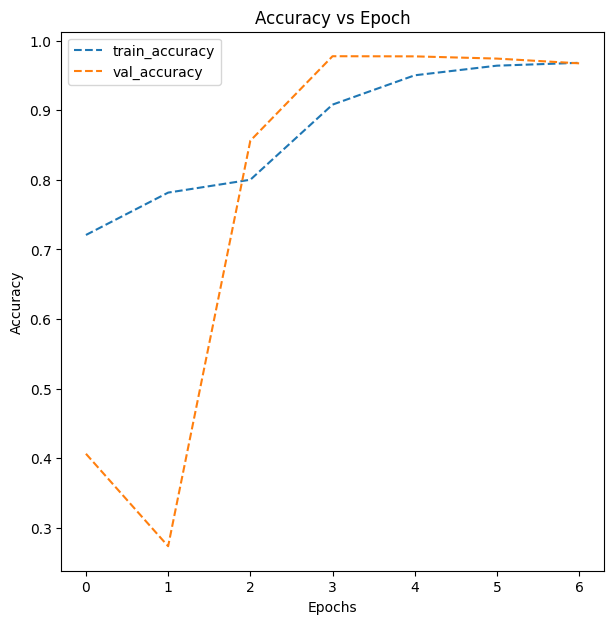

In [ ]:
# plotting the accuracies
plot_accuracy(history5)

In [ ]:
# Evaluating the model on test data
accuracy5 = model5.evaluate(test_images_hsv, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy5[1])

82/82 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9723

 Test_Accuracy: 0.9723076820373535


82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0      0.974     0.970     0.972      1300
           1      0.970     0.975     0.972      1300

    accuracy                          0.972      2600
   macro avg      0.972     0.972     0.972      2600
weighted avg      0.972     0.972     0.972      2600



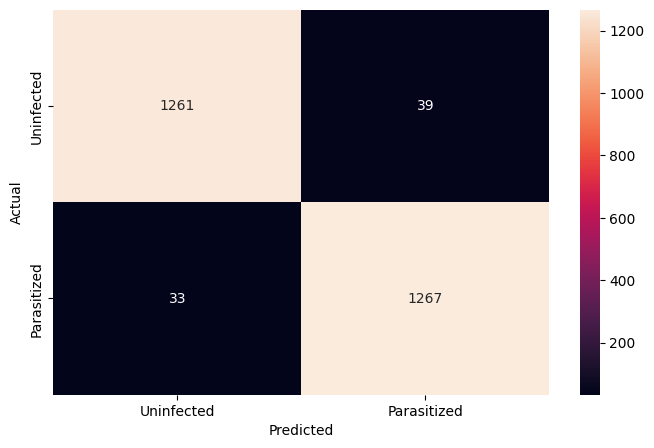

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model5.predict(test_images_hsv)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

## **Model 6 (Gaussian Blurring)**

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
 # Convert train images to blurred images

import cv2
gbx_train = []  # To hold the blurred images

for i in np.arange(0, 24958, 1):

  #b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  b = cv2.GaussianBlur(train_images[i], (5, 5), 0)

  gbx_train.append(b)

gbx_train = np.array(gbx_train)



In [ ]:
len(gbx_train)

24958

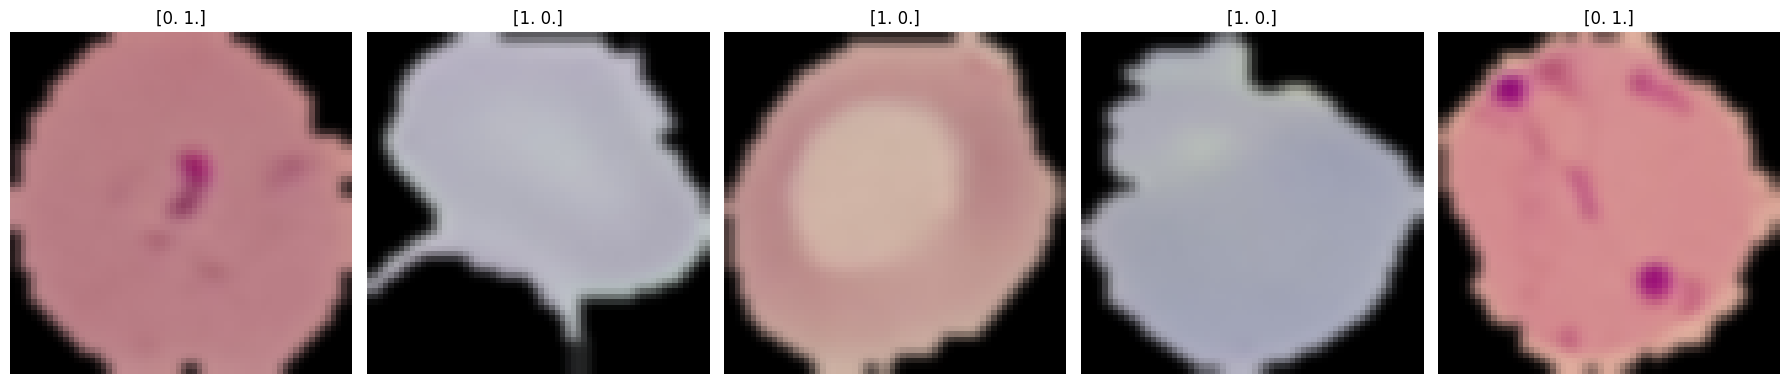

In [ ]:
#Visualize blurred train images
viewimage = np.random.randint(1, 24958, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = train_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx_train[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
 # Convert test images to blurred images

import cv2
gbx_test = []  # To hold the blurred images

for i in np.arange(0, 2600, 1):

  #b = cv2.GaussianBlur(train_images[i], (5, 5), 0)
  b = cv2.GaussianBlur(test_images[i], (5, 5), 0)

  gbx_test.append(b)

gbx_test = np.array(gbx_test)

In [ ]:
len(gbx_test)

2600

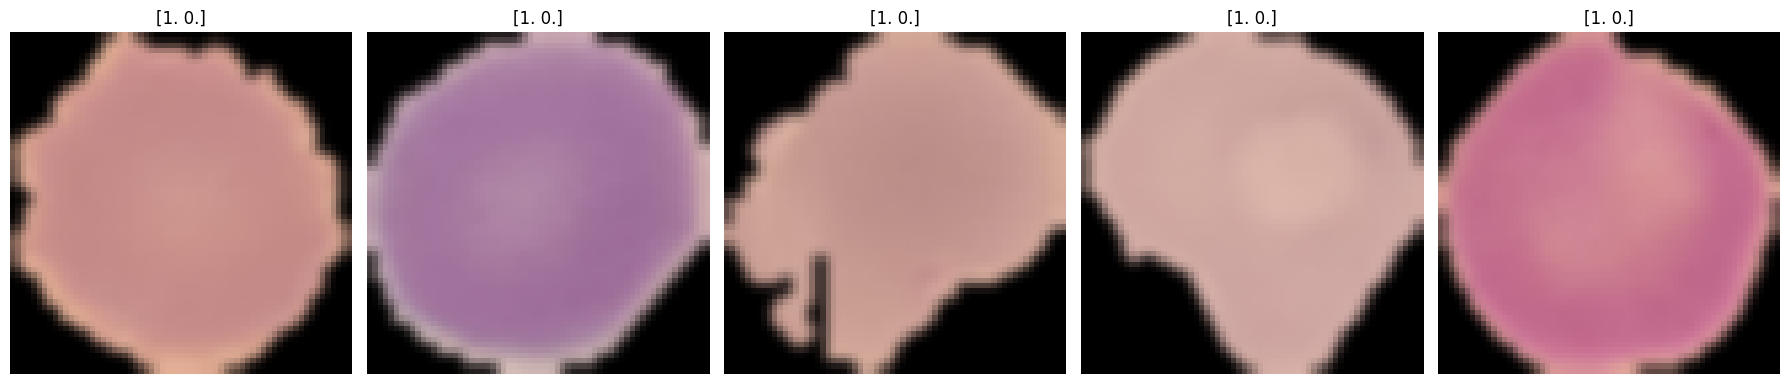

In [ ]:
#Visualize blurred train images
viewimage = np.random.randint(1, 2600, 5)

fig, ax = plt.subplots(1, 5, figsize = (18, 18))

for t, i in zip(range(5), viewimage):

  Title = test_labels[i]

  ax[t].set_title(Title)


  ax[t].imshow(gbx_test[i])

  ax[t].set_axis_off()

  fig.tight_layout()

In [ ]:
# CNN model with 5 convolutional layers
model8 = Sequential()

# First Convolutional Layer
model8.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model8.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model8.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model8.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Convolutional Layer
model8.add(Conv2D(512, kernel_size=(3, 3), padding='same'))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model8.add(Flatten())

# First Dense Layer
model8.add(Dense(512))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

# Second Dense Layer
model8.add(Dense(256))
model8.add(LeakyReLU(alpha=0.1))
model8.add(BatchNormalization())
model8.add(Dropout(0.5))

# Output Layer
model8.add(Dense(2, activation = "softmax"))


# Compile the model

model8.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer

model8.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 64)        0

In [ ]:
history8 = model8.fit(gbx_train,train_labels,
                      epochs = 10,
                      callbacks = callbacks,
                      batch_size = 32,
                      validation_split = 0.2,
                               verbose = 1)

Epoch 1/10
624/624 [==============================] - 11s 10ms/step - loss: 0.2276 - accuracy: 0.9153 - val_loss: 0.0157 - val_accuracy: 0.9956
Epoch 2/10
624/624 [==============================] - 6s 9ms/step - loss: 0.0863 - accuracy: 0.9747 - val_loss: 0.0185 - val_accuracy: 0.9938
Epoch 3/10
624/624 [==============================] - 6s 9ms/step - loss: 0.0749 - accuracy: 0.9763 - val_loss: 0.0097 - val_accuracy: 0.9972
Epoch 4/10
624/624 [==============================] - 6s 9ms/step - loss: 0.0749 - accuracy: 0.9758 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 5/10
624/624 [==============================] - 6s 9ms/step - loss: 0.0668 - accuracy: 0.9783 - val_loss: 0.0449 - val_accuracy: 0.9832


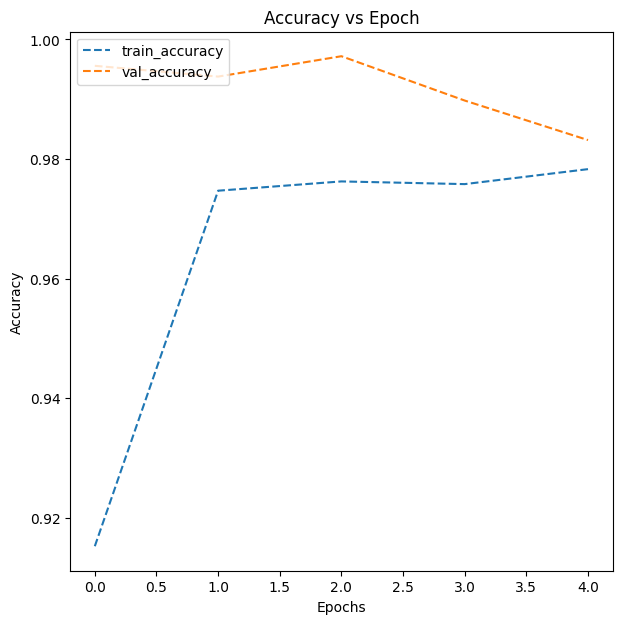

In [ ]:
# plotting the accuracies
plot_accuracy(history8)

In [ ]:
# Evaluating the model on test data
accuracy8 = model8.evaluate(gbx_test, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy8[1])

82/82 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9846

 Test_Accuracy: 0.9846153855323792


82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0      0.985     0.984     0.985      1300
           1      0.984     0.985     0.985      1300

    accuracy                          0.985      2600
   macro avg      0.985     0.985     0.985      2600
weighted avg      0.985     0.985     0.985      2600



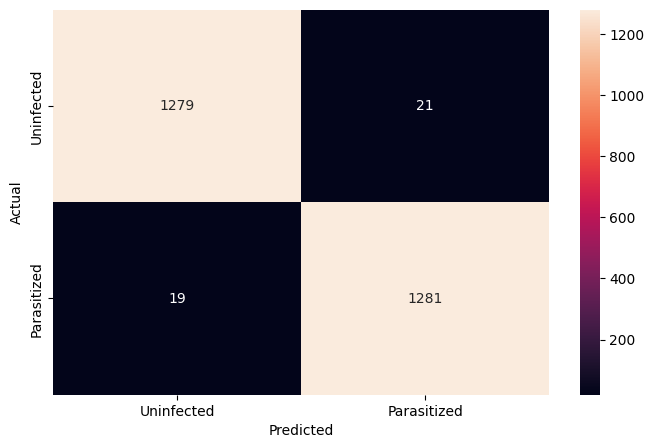

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model8.predict(gbx_test)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

## **Model 7 (Pre-trained model VGG16)**

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
# Clearing backend
from tensorflow.keras import backend

backend.clear_session()

# Fixing the seed for random number generators
np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (64, 64, 3))

vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

include_top: This argument is left blank in the code snippet, but it can be set to True or False. If True, the model includes the fully connected layers at the top of the network, which are responsible for classifying the input image. If False, the top layers are not included, and the output of the model is the feature maps of the last convolutional layer. In the code snippet, the value of include_top is not specified, so it defaults to True.

weights: This argument specifies the weight initialization to use for the model. In the code snippet, the value of 'imagenet' is specified, which means that the pre-trained weights for the model on the ImageNet dataset will be used.

input_shape: This argument specifies the shape of the input image to the model. In the code snippet, the value of (64, 64, 3) is specified, which means that the input images will be resized to 64x64 pixels and will have 3 color channels (RGB).

In [ ]:
transfer_layer = vgg.get_layer('block5_pool')

vgg.trainable = False

# Add classification layers on top of it
x = Flatten()(transfer_layer.output)  # Flatten the output from the 3rd block of the VGG16 model

x = Dense(256, activation = 'relu')(x)

# Similarly add a dense layer with 128 neurons
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.3)(x)

# Add a dense layer with 64 neurons
x = Dense(64, activation = 'relu')(x)
x = BatchNormalization()(x)

# Add the final output layer for binary classification
pred = Dense(2, activation='softmax')(x)

model4 = Model(vgg.input, pred) # Initializing the model


####<b>Compiling the model

In [ ]:
# Compiling the model

model4.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

<b> using callbacks

In [ ]:
# Adding Callbacks to the model
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

<b>Fit and Train the model

In [ ]:
# Fitting the model and running the model for 10 epochs

history4 = model4.fit(train_generator, validation_data = val_generator,
                      epochs = 10,
                      callbacks = callbacks,
                      batch_size = 32,
                      validation_split = 0.2,
                               verbose = 1)


Epoch 1/10
312/312 [==============================] - 24s 70ms/step - loss: 0.2544 - accuracy: 0.8992 - val_loss: 0.1779 - val_accuracy: 0.9315
Epoch 2/10
312/312 [==============================] - 22s 69ms/step - loss: 0.1929 - accuracy: 0.9251 - val_loss: 0.1413 - val_accuracy: 0.9479
Epoch 3/10
312/312 [==============================] - 22s 69ms/step - loss: 0.1771 - accuracy: 0.9338 - val_loss: 0.1322 - val_accuracy: 0.9499
Epoch 4/10
312/312 [==============================] - 21s 69ms/step - loss: 0.1715 - accuracy: 0.9358 - val_loss: 0.1322 - val_accuracy: 0.9535
Epoch 5/10
312/312 [==============================] - 21s 68ms/step - loss: 0.1675 - accuracy: 0.9374 - val_loss: 0.1715 - val_accuracy: 0.9391


<b>Plot the train and validation accuracy

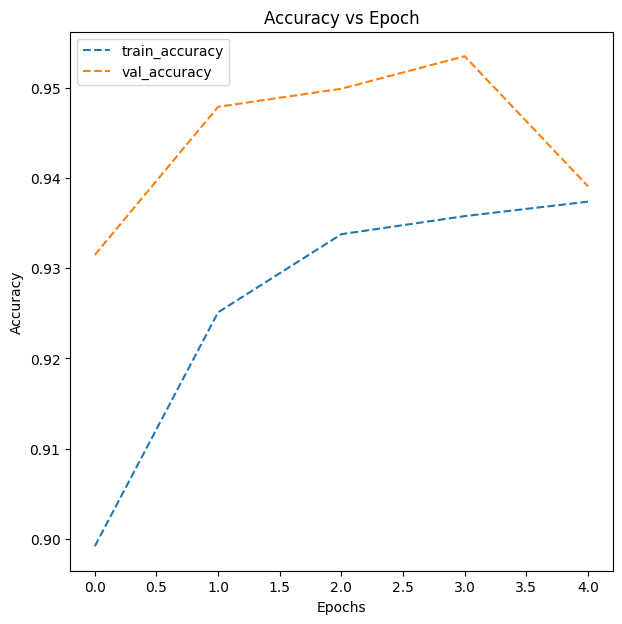

In [ ]:
# plotting the accuracies
plot_accuracy(history4)

####<b> Evaluating the model

In [ ]:
# Evaluating the model on test data
accuracy4 = model4.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy4[1])


82/82 [==============================] - 0s 5ms/step - loss: 0.1442 - accuracy: 0.9488

 Test_Accuracy: 0.948846161365509


<b>Plotting the classification report and confusion matrix

82/82 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0      0.924     0.978     0.950      1300
           1      0.976     0.920     0.947      1300

    accuracy                          0.949      2600
   macro avg      0.950     0.949     0.949      2600
weighted avg      0.950     0.949     0.949      2600



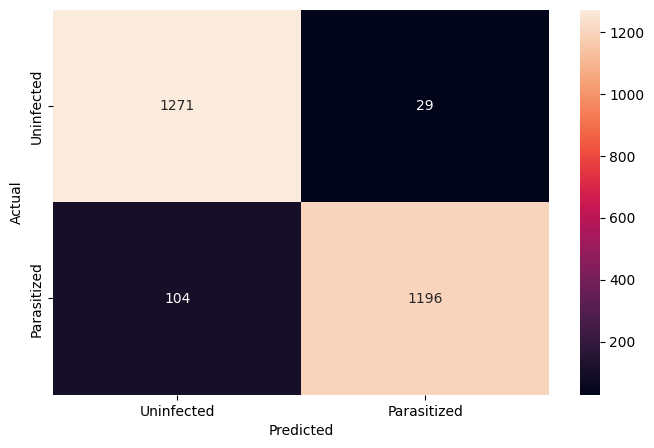

In [ ]:
# Plot the confusion matrix and generate a classification report for the model

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model4.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred, digits=3))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

## **Building model with 14 convolutional layers**

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
# CNN model with 14 layers
# Define the model
model6 = Sequential()

# Add the first convolutional layer with 32 filters of size 3x3
model6.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), padding='same'))
model6.add(LeakyReLU(alpha=0.1))
model6.add(BatchNormalization())

# Add 12 more convolutional layers with 64 filters of size 3x3 and relu activation
for i in range(6):
    model6.add(Conv2D(64, (3, 3), padding='same'))
    model6.add(LeakyReLU(alpha=0.1))
    model6.add(BatchNormalization())
    model6.add(Conv2D(64, (3, 3), padding='same'))
    model6.add(LeakyReLU(alpha=0.1))
    model6.add(BatchNormalization())
    model6.add(MaxPooling2D(pool_size=(2, 2)))
    model6.add(Dropout(0.25))

# Add a flatten layer to convert the 2D feature map into a 1D feature vector
model6.add(Flatten())

# Add a fully connected layer with 128 units and relu activation
model6.add(Dense(128))
model6.add(LeakyReLU(alpha=0.1))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))

# Add the output layer with softmax activation for classification
#model.add(Dense(num_classes, activation='softmax'))
model6.add(Dense(2, activation = "softmax")) # 2 represents output layer neurons

# Compile the model

model6.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model6.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 64, 64, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 64, 64, 64)       256       
 hNormalization)                                        

####  **Using callbacks**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]



####  **Fit and train the model**

In [ ]:
history6 = model6.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 42s 49ms/step - loss: 0.4563 - accuracy: 0.7892 - val_loss: 0.0861 - val_accuracy: 0.9852
Epoch 2/20
624/624 [==============================] - 29s 46ms/step - loss: 0.0936 - accuracy: 0.9711 - val_loss: 0.0383 - val_accuracy: 0.9850
Epoch 3/20
624/624 [==============================] - 28s 46ms/step - loss: 0.0791 - accuracy: 0.9738 - val_loss: 0.0274 - val_accuracy: 0.9898
Epoch 4/20
624/624 [==============================] - 29s 47ms/step - loss: 0.0733 - accuracy: 0.9741 - val_loss: 0.0686 - val_accuracy: 0.9732
Epoch 5/20
624/624 [==============================] - 28s 46ms/step - loss: 0.0642 - accuracy: 0.9786 - val_loss: 0.0232 - val_accuracy: 0.9928
Epoch 6/20
624/624 [==============================] - 28s 45ms/step - loss: 0.0660 - accuracy: 0.9781 - val_loss: 0.0451 - val_accuracy: 0.9812
Epoch 7/20
624/624 [==============================] - 28s 45ms/step - loss: 0.0604 - accuracy: 0.9793 - val_loss: 0.0531 - val_accuracy:

####  **Plotting the train and validation accuracy**

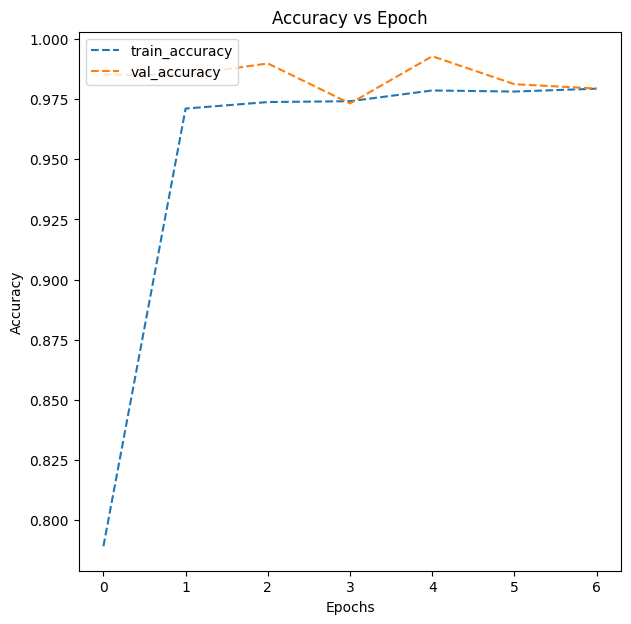

In [ ]:
# Plotting the accuracies
# train and validation accuracy
def plot_accuracy(history6):

    N = len(history6.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history6.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history6.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")


plot_accuracy(history6)



####  **Evaluating the model**

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy6 = model6.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy6[1])


82/82 [==============================] - 1s 13ms/step - loss: 0.0450 - accuracy: 0.9846

 Test_Accuracy: 0.9846153855323792


####  **Generate the classification report and confusion matrix**

82/82 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1300
           1       0.98      0.99      0.98      1300

    accuracy                           0.98      2600
   macro avg       0.98      0.98      0.98      2600
weighted avg       0.98      0.98      0.98      2600



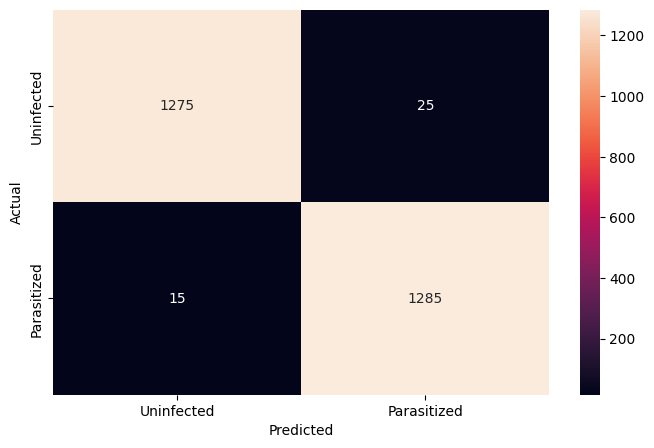

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model6.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()



## **Building model with 5 convolutional layers**

In [ ]:
backend.clear_session() # Clearing backend for new model

In [ ]:
# CNN model with 10 layers
model7 = Sequential()

# First Convolutional Layer
model7.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(64, 64, 3)))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model7.add(Conv2D(64, kernel_size=(3, 3), padding='same'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model7.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth Convolutional Layer
model7.add(Conv2D(256, kernel_size=(3, 3), padding='same'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Fifth Convolutional Layer
model7.add(Conv2D(512, kernel_size=(3, 3), padding='same'))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model7.add(Flatten())

# First Dense Layer
model7.add(Dense(512))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

# Second Dense Layer
model7.add(Dense(256))
model7.add(LeakyReLU(alpha=0.1))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

# Output Layer
model7.add(Dense(2, activation = "softmax"))


# Compile the model

model7.compile(loss = "binary_crossentropy", optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])


model7.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 64, 64, 32)        0         
                                                                 
 batch_normalization_7 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 32, 32, 64)       

#### **Using callbacks**

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', patience = 2),
             ModelCheckpoint('.mdl_wts.hdf5', monitor = 'val_loss', save_best_only = True)]

#### **Fit and train the model**

In [ ]:
history7 = model7.fit(train_images, train_labels, batch_size = 32, callbacks = callbacks, validation_split = 0.2, epochs = 20, verbose = 1)

Epoch 1/20
624/624 [==============================] - 12s 10ms/step - loss: 0.2156 - accuracy: 0.9221 - val_loss: 0.0213 - val_accuracy: 0.9962
Epoch 2/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0871 - accuracy: 0.9726 - val_loss: 0.0376 - val_accuracy: 0.9864
Epoch 3/20
624/624 [==============================] - 5s 8ms/step - loss: 0.0725 - accuracy: 0.9771 - val_loss: 0.0364 - val_accuracy: 0.9864


####  **Plotting the train and validation accuracy**


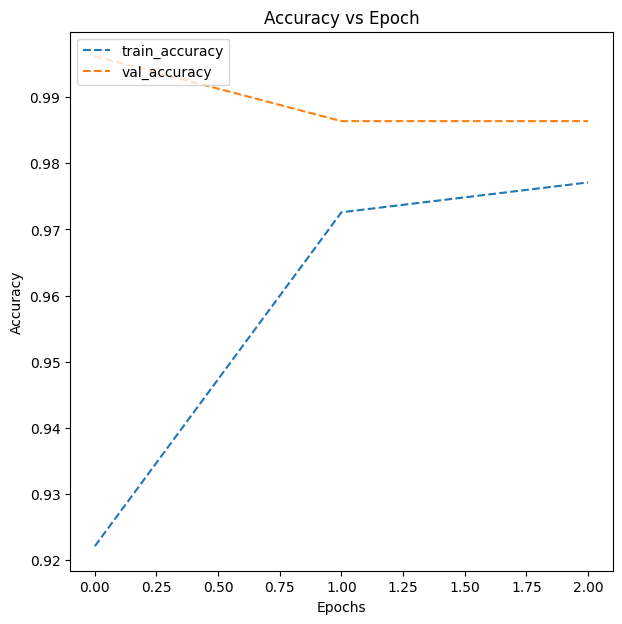

In [ ]:
# Plotting the accuracies
# train and validation accuracy
def plot_accuracy(history7):

    N = len(history7.history["accuracy"])

    plt.figure(figsize = (7, 7))

    plt.plot(np.arange(0, N), history7.history["accuracy"], label = "train_accuracy", ls = '--')

    plt.plot(np.arange(0, N), history7.history["val_accuracy"], label = "val_accuracy", ls = '--')

    plt.title("Accuracy vs Epoch")

    plt.xlabel("Epochs")

    plt.ylabel("Accuracy")

    plt.legend(loc="upper left")


plot_accuracy(history7)

####  **Evaluating the model**

In [ ]:
# Evaluate the model to calculate the accuracy

accuracy7 = model7.evaluate(test_images, test_labels, verbose = 1)

print('\n', 'Test_Accuracy:', accuracy7[1])

82/82 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9862

 Test_Accuracy: 0.9861538410186768


####  **Generate the classification report and confusion matrix**

82/82 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1300
           1       0.99      0.98      0.99      1300

    accuracy                           0.99      2600
   macro avg       0.99      0.99      0.99      2600
weighted avg       0.99      0.99      0.99      2600



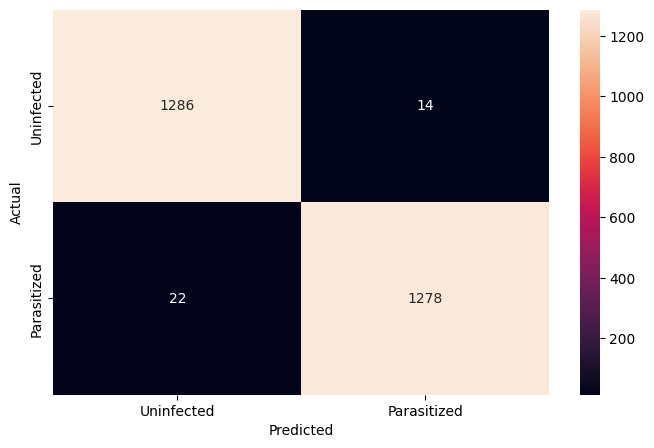

In [ ]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

pred = model7.predict(test_images)

pred = np.argmax(pred, axis = 1)

y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_true, pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f', xticklabels = ['Uninfected', 'Parasitized'], yticklabels = ['Uninfected', 'Parasitized'])

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()